## Центральная предельная теорема

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
%matplotlib inline

Треугольное распределение случайной величины (https://en.wikipedia.org/wiki/Triangular_distribution) + выборка объемом 1000:

$EX = \frac{a + b + c}{3}$ - матожидание

$DX = \frac{a ^ {2} + b ^ {2} + c ^ {2} -ab-ac-bc}{18}$ - дисперсия

In [6]:
c = 0.2 # мода треугольного распределения
a, b = 0, 1 # границы распределения
sample = sts.triang(c)
select = sample.rvs(size=1000) # выборка объёмом 1000
EX = (a + b + c)/3.0
DX = (a**2 + b**2 + c**2 - a*b - a*c - b*c)/18
print ('Матожидание: ', EX)
print ('Дисперсия: ', DX)

Матожидание:  0.39999999999999997
Дисперсия:  0.04666666666666667


Построение гистограммы выборки + теоретической плотности распределения случайной величины:

Text(0.5, 0, '$x$')

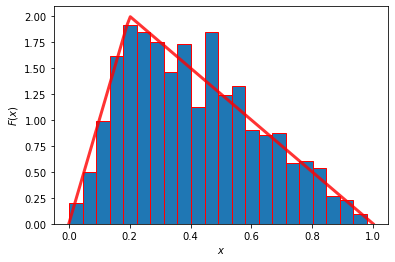

In [9]:
x = np.linspace(a, b, 100)
pdf = sample.pdf(x)
plt.hist(select, density=True, bins = 22, histtype= 'bar', ec='black') # построение гистограммы
plt.plot(x, pdf, 'r-', lw=3, alpha=0.8) # построение теоретической плотности распределения

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция генерации 1000 выборок объёма n:

In [10]:
def select_n(n):
    for i in range(0, 1000):
        select_n = sample.rvs(size=n)
        Xn = 0
        for j in range(0, len(select_n)):
            Xn += select_n[j]
        Xn = Xn/n
        list_n.append(Xn)
    return list_n

Функция потроения гистограммы выборочных средних для выборки объёма n:

In [12]:
def hist_n(n):
    mu = EX
    sigma = (DX/n)**(0.5)
    norm_rv = sts.norm(loc=mu, scale=sigma) #  плотность соответствующего нормального распределения

    x = np.linspace(a, b, 100)
    pdf = norm_rv.pdf(x)
    plt.hist(list_n, density=True, bins = 22, histtype= 'bar', ec='black') # построение гистограммы
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.8) # построение теоретической плотности распределения

    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    
print ('Матожидание: ', EX)
print ('Дисперсия: ', DX)

Матожидание:  0.39999999999999997
Дисперсия:  0.04666666666666667


Построение гистограммы выброчных средних для выборки объёма n=5:

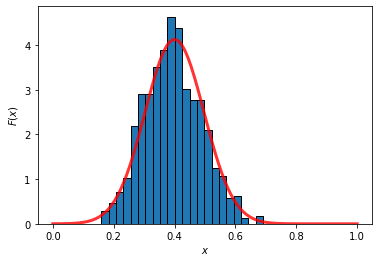

In [13]:
list_n = []
select_n(5)
hist_n(5)

Построение гистограммы выброчных средних для выборки объёма n=10:

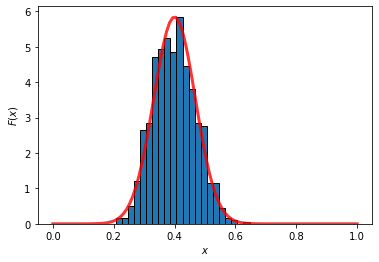

In [14]:
list_n = []
select_n(10)
hist_n(10)

Построение гистограммы выброчных средних для выборки объёма n=50:

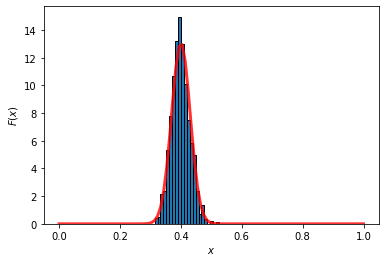

In [15]:
list_n = []
select_n(50)
hist_n(50)

Построение гистограммы выброчных средних для выборки объёма n=200:

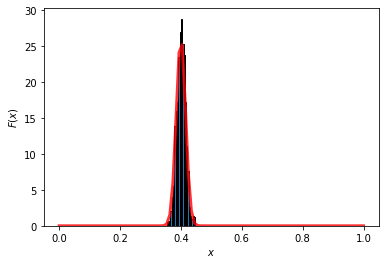

In [16]:
list_n = []
select_n(200)
hist_n(200)